In [1]:
import pandas as pd
import matplotlib.pyplot as plt
 # カリフォルニア住宅価格のデータセット
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target


In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


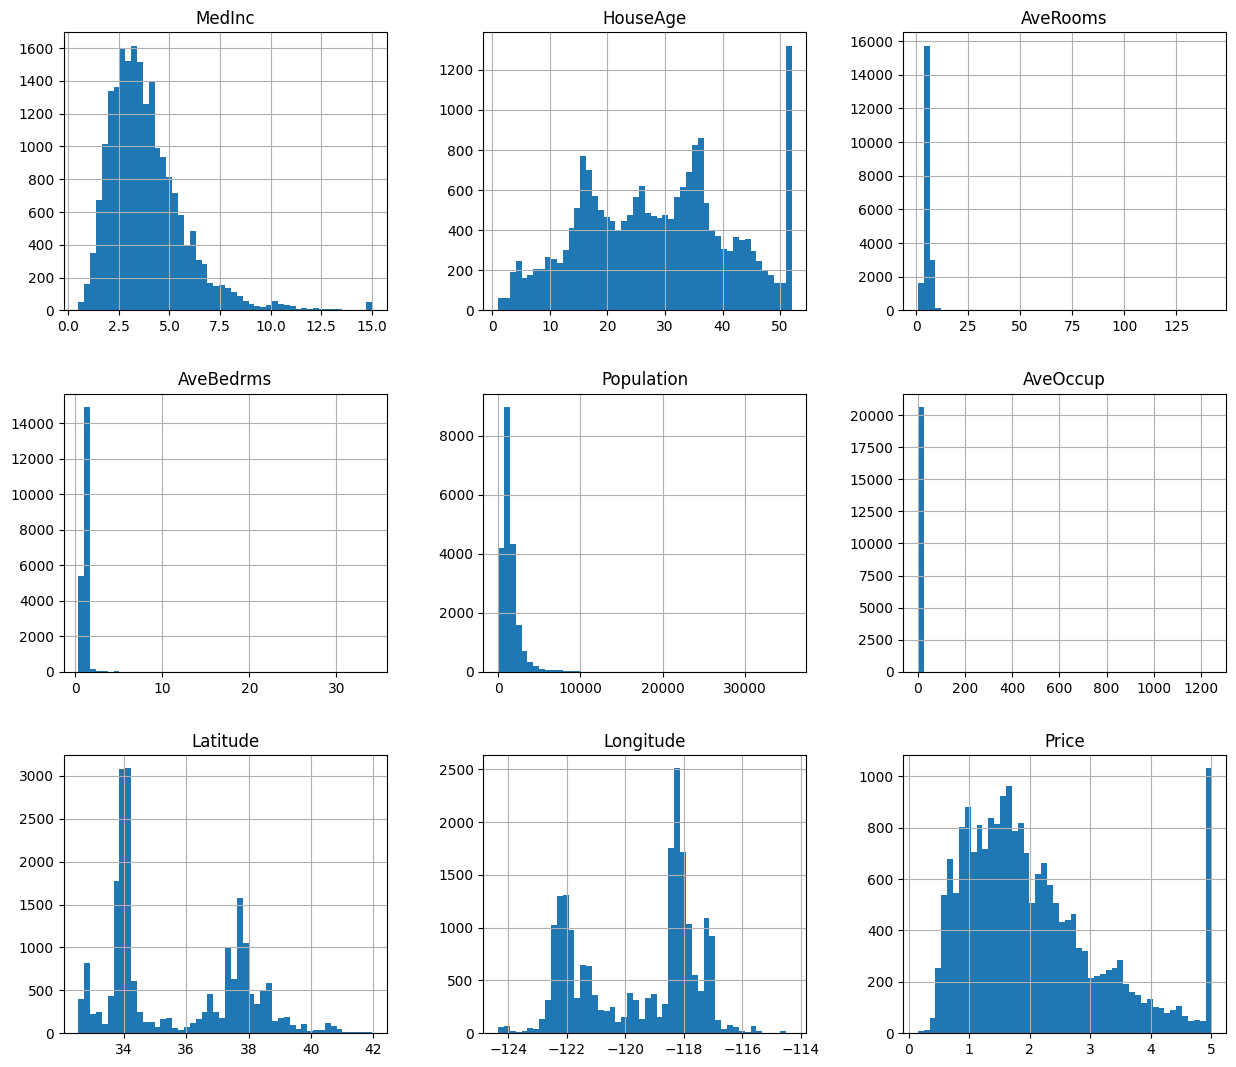

In [5]:
df.hist(bins=50, figsize=(15, 13))
plt.show()

In [6]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [7]:
# 築年数、価格の最大値が全体の傾向に対して突出しているため、除外する
df = df[df['HouseAge'] < df['HouseAge'].max()]
df = df[df['Price'] < df['Price'].max()]

In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,3.693262,26.983847,5.386957,1.098443,1470.392957,3.108596,35.593231,-119.484929,1.896076
std,1.570045,11.431815,2.337897,0.463798,1162.944307,10.811650,2.147712,1.980865,0.957902
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.300000,0.149990
25%,2.537275,17.000000,4.430211,1.005803,811.000000,2.469421,33.920000,-121.550000,1.154000
50%,3.468350,27.000000,5.208816,1.048309,1203.000000,2.855824,34.240000,-118.450000,1.712000
75%,4.616100,36.000000,5.989280,1.099192,1781.000000,3.320622,37.670000,-117.970000,2.432250
max,15.000100,51.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000000


In [9]:
# 説明変数
X = df.drop(['Price'], axis=1)
# 目的変数
y = df['Price']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#標準化
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(14857, 8) (3715, 8)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# モデルの構築
lr = LinearRegression()
nn = MLPRegressor()
nn_ad = MLPRegressor(hidden_layer_sizes=(100,100), early_stopping=True, n_iter_no_change=5)

# モデルの学習
lr.fit(X_train, y_train)
nn.fit(X_train, y_train)
nn_ad.fit(X_train, y_train)


,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True


In [13]:
from sklearn.metrics import root_mean_squared_error

lr_pred = lr.predict(X_train)
nn_pred = nn.predict(X_train)
nn_ad_pred = nn_ad.predict(X_train)

lr_rmse = root_mean_squared_error(y_train, lr_pred)
nn_rmse = root_mean_squared_error(y_train, nn_pred)
nn_ad_rmse = root_mean_squared_error(y_train, nn_ad_pred)

print(f'LinearRegression RMSE:{lr_rmse}')
print(f'MLPRegressor RMSE:{nn_rmse}')

LinearRegression RMSE:0.622718526213239
MLPRegressor RMSE:0.4751107499499528


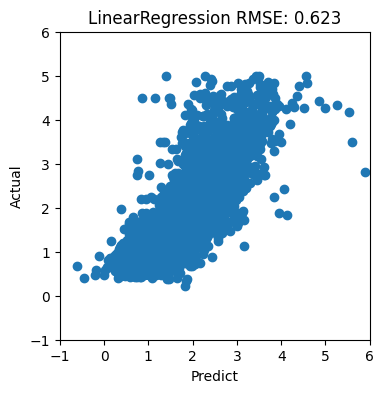

In [14]:
plt.figure(figsize=(4,4))
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.plot(lr.predict(X_test), y_test, 'o')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('LinearRegression RMSE: {:.3f}'.format(lr_rmse))
plt.show()

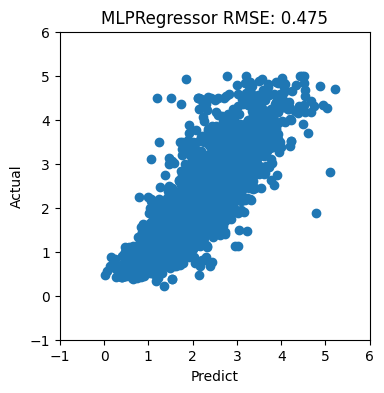

In [15]:
plt.figure(figsize=(4,4))
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.plot(nn.predict(X_test), y_test, 'o')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('MLPRegressor RMSE: {:.3f}'.format(nn_rmse))
plt.show()

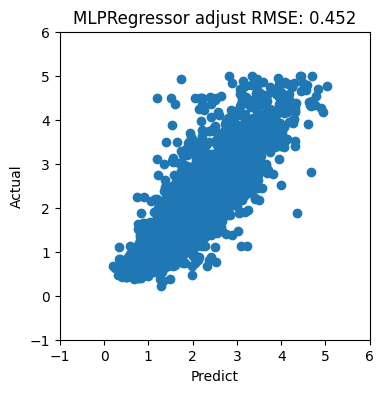

In [16]:
plt.figure(figsize=(4,4))
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.plot(nn_ad.predict(X_test), y_test, 'o')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('MLPRegressor adjust RMSE: {:.3f}'.format(nn_ad_rmse))
plt.show()